In [1]:
from deep_learning_models import *
from helper.dataset_reader import read_tsv

In [2]:
from tensorflow.python.client import device_lib

print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.8.0
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
data = read_tsv('../dataset/comlid-data-140422-v1.tsv')

In [4]:
all_data, all_words, all_tags = data

In [5]:
df = list_to_dataframe(data)

In [6]:
words = get_unique_words(df)
tags = get_unique_tags(df)

In [7]:
tags

['EN', 'MIX-ID-JV', 'O', 'ID', 'MIX-JV-EN', 'MIX-ID-EN', 'JV']

In [8]:
dt_pair = to_token_tag_list(data)

In [9]:
X, y = input_data(words, tags, dt_pair)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [11]:
num_words = len(words)
num_tags = len(tags)
max_len = 50
model = blstm_model(num_words, num_tags, max_len)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1344500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 7)            1407      
 ibuted)                                                         
                                                             

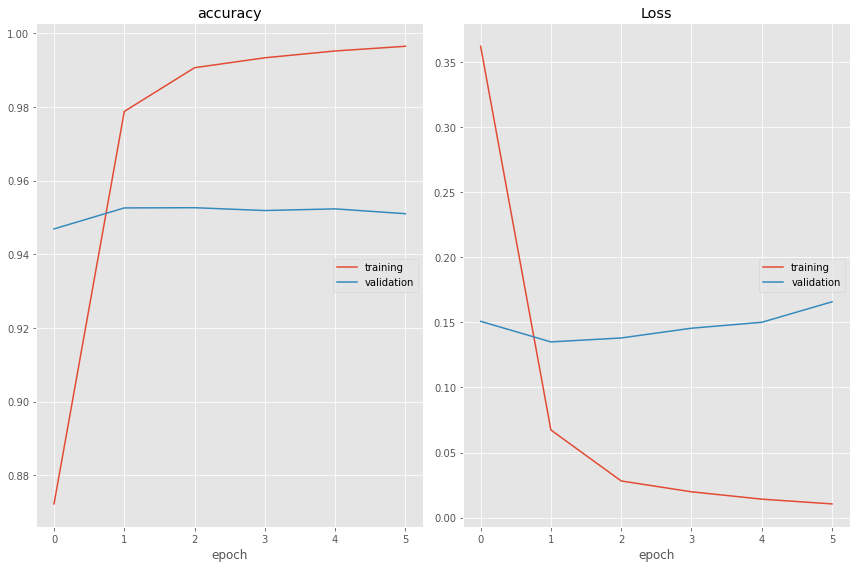

accuracy
	training         	 (min:    0.872, max:    0.997, cur:    0.997)
	validation       	 (min:    0.947, max:    0.953, cur:    0.951)
Loss
	training         	 (min:    0.011, max:    0.362, cur:    0.011)
	validation       	 (min:    0.135, max:    0.166, cur:    0.166)

Epoch 6: val_loss did not improve from 0.13494
56/56 [==============================] - 3s 44ms/step - loss: 0.1657 - accuracy: 0.9510
[0.16573017835617065, 0.951027512550354]


In [12]:
model_name = 'blstm_model.h5'
training_history(model, model_name, x_train, y_train, x_test, y_test, num_epoch=50, batch_sz=32)

56/56 [==============================] - 3s 43ms/step
              precision    recall  f1-score   support

          ID       0.89      0.96      0.92     21495
          JV       0.85      0.86      0.86      4734
          EN       0.88      0.88      0.88      5202
   MIX-ID-EN       0.98      0.82      0.90       996
   MIX-ID-JV       0.99      0.78      0.87       318
   MIX-JV-EN       0.94      0.83      0.88       238
           O       0.99      0.97      0.98     56067

    accuracy                           0.95     89050
   macro avg       0.93      0.87      0.90     89050
weighted avg       0.95      0.95      0.95     89050



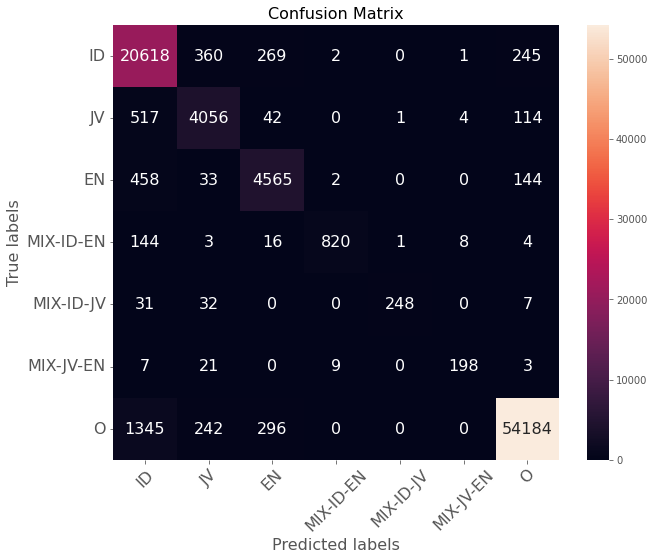

In [13]:
performance_report(model, x_test, y_test, tags, df)